# Nishu's Part

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv(r"ames.csv")
# Check some basic info about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   area             2930 non-null   int64  
 3   price            2930 non-null   int64  
 4   MS.SubClass      2930 non-null   int64  
 5   MS.Zoning        2930 non-null   object 
 6   Lot.Frontage     2440 non-null   float64
 7   Lot.Area         2930 non-null   int64  
 8   Street           2930 non-null   object 
 9   Alley            198 non-null    object 
 10  Lot.Shape        2930 non-null   object 
 11  Land.Contour     2930 non-null   object 
 12  Utilities        2930 non-null   object 
 13  Lot.Config       2930 non-null   object 
 14  Land.Slope       2930 non-null   object 
 15  Neighborhood     2930 non-null   object 
 16  Condition.1      2930 non-null   object 
 17  Condition.2   

In [2]:
data.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


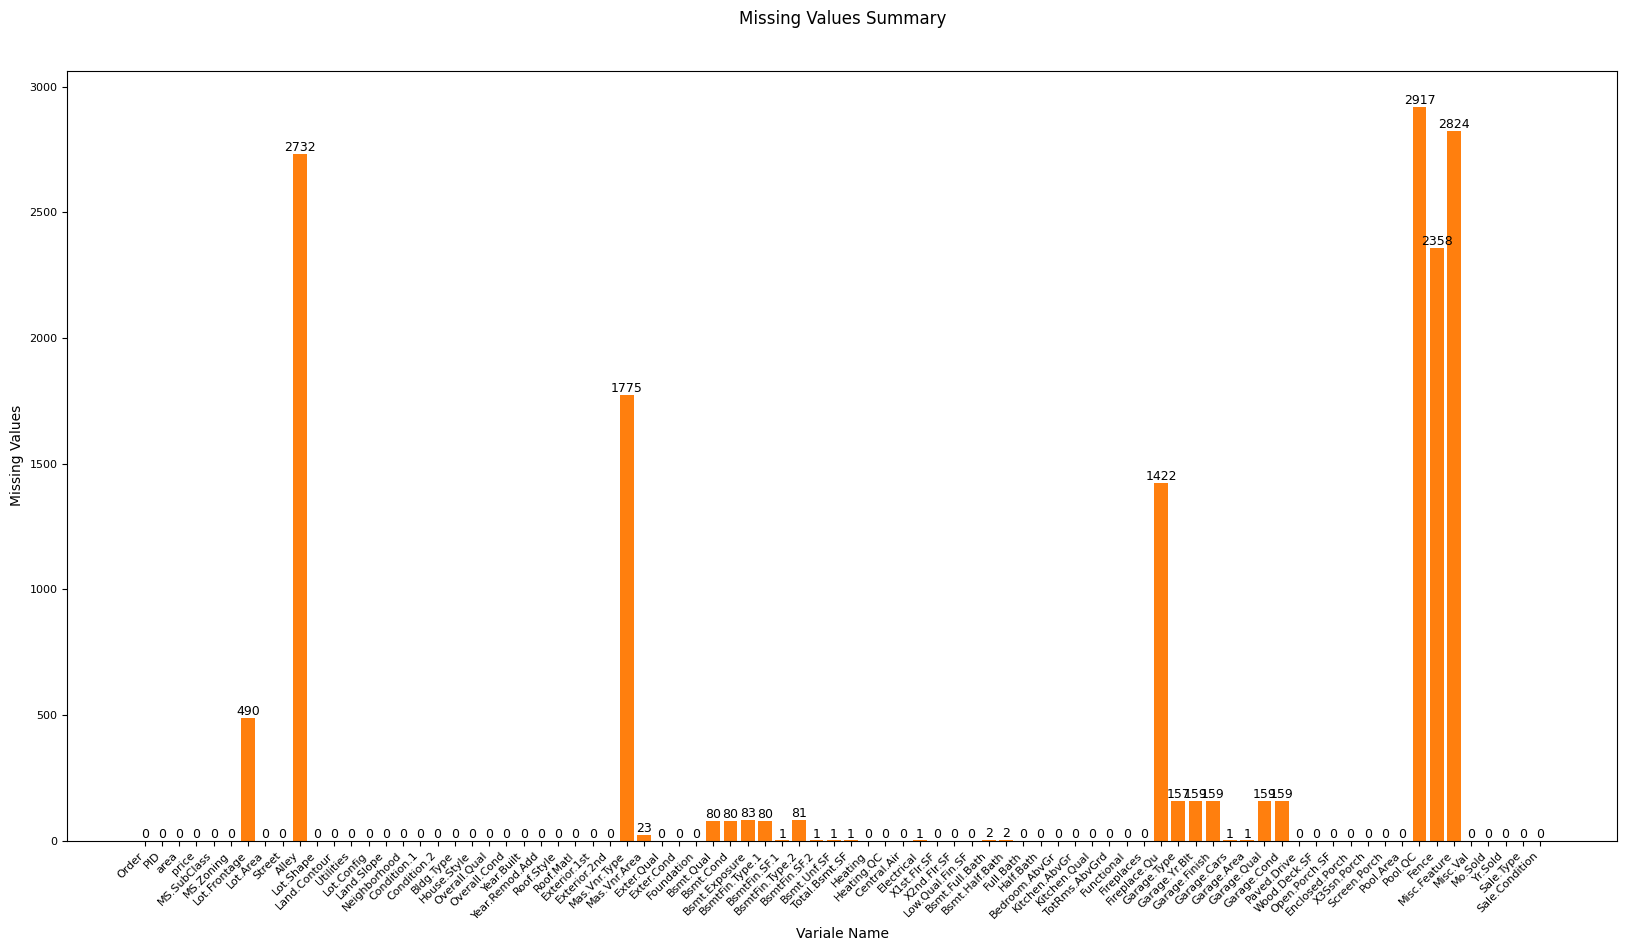

In [3]:
# Check for missing values
missing_values = data.isnull().sum()

# Creat the figure and specify the size
plt.figure(figsize=(20, 10))

# Create the bar chart
bars = plt.bar(missing_values.index, missing_values.values)
plt.bar(missing_values.index, missing_values.values)
plt.xlabel('Variale Name')
plt.ylabel('Missing Values')
plt.title('Missing Values Summary', y=1.05)

# Rotate x-axis labels for better visibility and reduce font size
plt.xticks(rotation=45, ha='right', fontsize=8)  # Adjust the rotation angle and font size as needed
plt.yticks(fontsize=8)

# Add the actual values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', fontsize=9)

# Save the plot as an image (PNG format in this example)
#plt.savefig('Ams_missing_values_plot.png', bbox_inches='tight')

plt.show()

The column with missing values percentage[Alley= 93%, Fireplace.Qu= 49%, Pool.QC= 99.6% Fence=80%, Misc.Feature=96.4%]

In [4]:
#Dropping column with most missing values [Alley= 93%, Fireplace.Qu= 49%, Pool.QC= 99.6% Fence=80%, Misc.Feature=96.4%]

data = data.drop(columns=['Alley', 'Fireplace.Qu', 'Pool.QC', 'Fence', 'Misc.Feature'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   area             2930 non-null   int64  
 3   price            2930 non-null   int64  
 4   MS.SubClass      2930 non-null   int64  
 5   MS.Zoning        2930 non-null   object 
 6   Lot.Frontage     2440 non-null   float64
 7   Lot.Area         2930 non-null   int64  
 8   Street           2930 non-null   object 
 9   Lot.Shape        2930 non-null   object 
 10  Land.Contour     2930 non-null   object 
 11  Utilities        2930 non-null   object 
 12  Lot.Config       2930 non-null   object 
 13  Land.Slope       2930 non-null   object 
 14  Neighborhood     2930 non-null   object 
 15  Condition.1      2930 non-null   object 
 16  Condition.2      2930 non-null   object 
 17  Bldg.Type     

In [5]:
data.columns[data.isnull().any()]

Index(['Lot.Frontage', 'Mas.Vnr.Type', 'Mas.Vnr.Area', 'Bsmt.Qual',
       'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.SF.1',
       'BsmtFin.Type.2', 'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF',
       'Electrical', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Garage.Type',
       'Garage.Yr.Blt', 'Garage.Finish', 'Garage.Cars', 'Garage.Area',
       'Garage.Qual', 'Garage.Cond'],
      dtype='object')

For imputation for numeric attributes we use median imputation to not be influenced by outliers, and for categorical we used mode imputaion.

In [6]:
#Missing values inputation

# List of columns for median imputation
columns_median_impute = ['Lot.Frontage', 'Mas.Vnr.Area', 'BsmtFin.SF.1', 'BsmtFin.SF.2',
                         'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath',
       'Garage.Yr.Blt', 'Garage.Cars', 'Garage.Area']

# List of columns for mode imputation
columns_mode_impute = [ 'Mas.Vnr.Type','Bsmt.Qual',
       'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1',
       'BsmtFin.Type.2','Electrical', 'Garage.Type',
       'Garage.Finish', 'Garage.Qual', 'Garage.Cond']
# Impute missing values with the median of the respective column
for column in columns_median_impute:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)

# Impute missing values with the mode of the respective column

for col in columns_mode_impute:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Check missing values again
missing_values_after_imputation = data.isnull().sum()

# Print the summary of missing values after imputation
print(missing_values_after_imputation)

Order             0
PID               0
area              0
price             0
MS.SubClass       0
                 ..
Misc.Val          0
Mo.Sold           0
Yr.Sold           0
Sale.Type         0
Sale.Condition    0
Length: 77, dtype: int64


In [7]:
# Checking if there is any missing value in any column
data.columns[data.isnull().any()]

Index([], dtype='object')

In [8]:
#statistical analysis
summary_stats = data.describe()
print(summary_stats)

            Order           PID         area          price  MS.SubClass  \
count  2930.00000  2.930000e+03  2930.000000    2930.000000  2930.000000   
mean   1465.50000  7.144645e+08  1499.690444  180796.060068    57.387372   
std     845.96247  1.887308e+08   505.508887   79886.692357    42.638025   
min       1.00000  5.263011e+08   334.000000   12789.000000    20.000000   
25%     733.25000  5.284770e+08  1126.000000  129500.000000    20.000000   
50%    1465.50000  5.354536e+08  1442.000000  160000.000000    50.000000   
75%    2197.75000  9.071811e+08  1742.750000  213500.000000    70.000000   
max    2930.00000  1.007100e+09  5642.000000  755000.000000   190.000000   

       Lot.Frontage       Lot.Area  Overall.Qual  Overall.Cond   Year.Built  \
count   2930.000000    2930.000000   2930.000000   2930.000000  2930.000000   
mean      69.019795   10147.921843      6.094881      5.563140  1971.356314   
std       21.326422    7880.017759      1.411026      1.111537    30.245361   

In [9]:
type(data)

pandas.core.frame.DataFrame

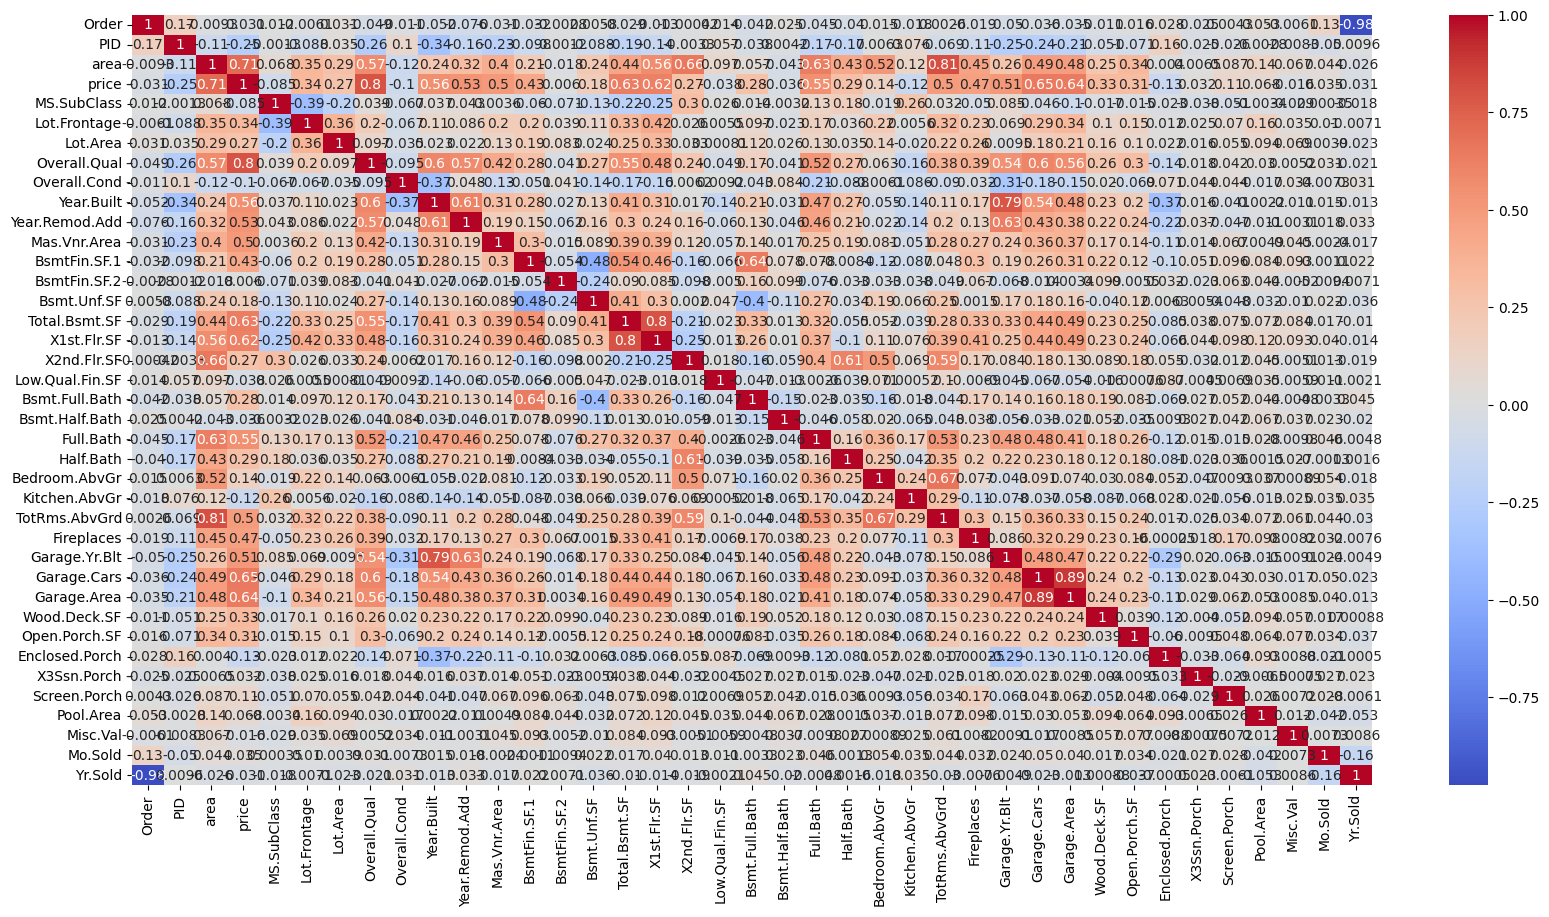

In [10]:
#corelation matrix
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data.corr(numeric_only=True)
# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

If we use correlation matrix, the highest attribute (categorical ) is Overall.Qual with 0.8 and the lowest attribute (numerical) is Bsmt.Full.Bath with 0.28 correlation value.

 * _we could explore more to find best features._

Also last 7 features does not have much correlation with the price attribute as we can see from the heatmap.

Also We could delte order attribute.

In [11]:
#Feature selection based on correlation matrix value

#chooisng 10/20 most correlated attributes
target_attribute = "price"
num_top_correlations = 20

# Sort the correlations with respect to the target_attribute in descending order
top_correlations = correlation_matrix[target_attribute].abs().nlargest(num_top_correlations)

# Get the attribute names for the top correlations
top_attributes = top_correlations.index

print("Top 10 most correlated attributes with respect to", target_attribute)
print(top_attributes)

Top 10 most correlated attributes with respect to price
Index(['price', 'Overall.Qual', 'area', 'Garage.Cars', 'Garage.Area',
       'Total.Bsmt.SF', 'X1st.Flr.SF', 'Year.Built', 'Full.Bath',
       'Year.Remod.Add', 'Garage.Yr.Blt', 'Mas.Vnr.Area', 'TotRms.AbvGrd',
       'Fireplaces', 'BsmtFin.SF.1', 'Lot.Frontage', 'Wood.Deck.SF',
       'Open.Porch.SF', 'Half.Bath', 'Bsmt.Full.Bath'],
      dtype='object')


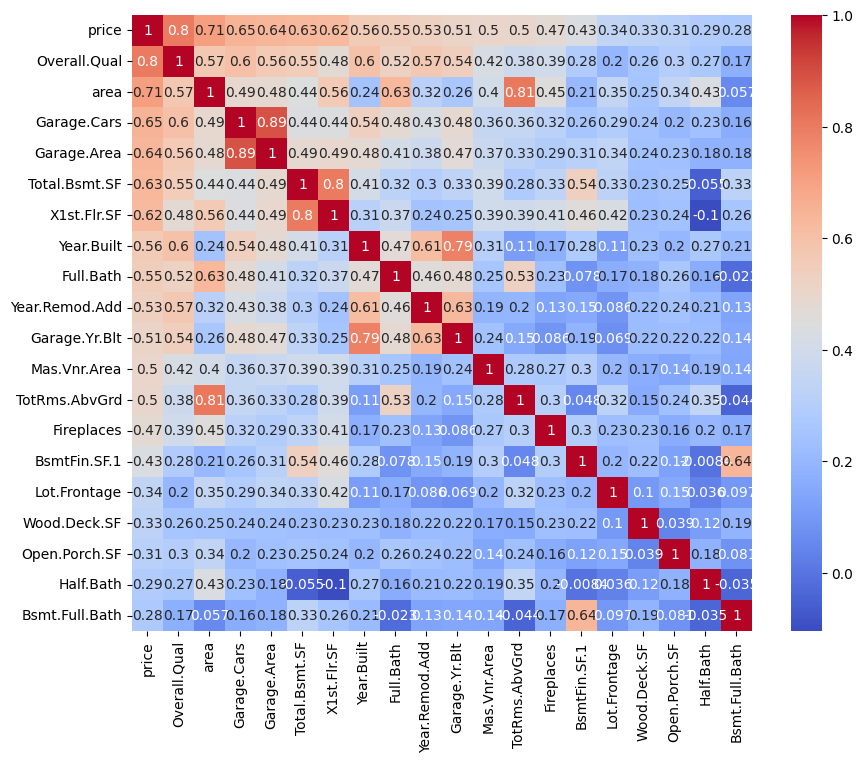

In [12]:
# Create a subset of the correlation matrix containing only the top 10 attributes
top_correlation_matrix = correlation_matrix.loc[top_attributes, top_attributes]

# Create a heatmap for the top 10 most correlated attributes
plt.figure(figsize=(10, 8))
sns.heatmap(top_correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

'Garage.Cars' and 'Garage.area' are same meaning attribute and the correlation is same.So we prefer taking only 'Garage.area'. Same goes for 'Total.Bsmt.SF' and 'X1st.Flr.SF'. We are choosing 'X1st.Flr.SF'

Among the first 20 features from 'Overall.Qual' to 'BsmtFin.SF.1' are most correlated.

So the ultimate selected columns are: 'price', 'Overall.Qual', 'area', 'Garage.Area', 'X1st.Flr.SF', 'Year.Built', 'Full.Bath', 'Year.Remod.Add', 'Garage.Yr.Blt', 'Mas.Vnr.Area', 'TotRms.AbvGrd', 'Fireplaces', 'BsmtFin.SF.1'

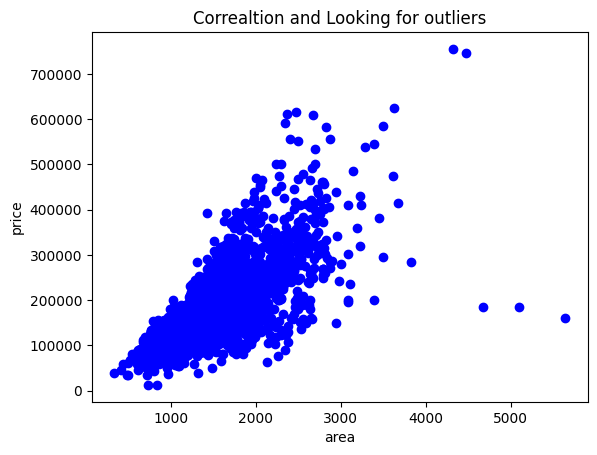

In [13]:
#data visualization for few features

#scatter plot for numerical attributes [area] to the price and correlation value with price is , r = 0.71
plt.scatter(data.area, data.price, c = "blue", marker = "o")
plt.title("Correaltion and Looking for outliers")
plt.xlabel("area")
plt.ylabel("price")
plt.show()

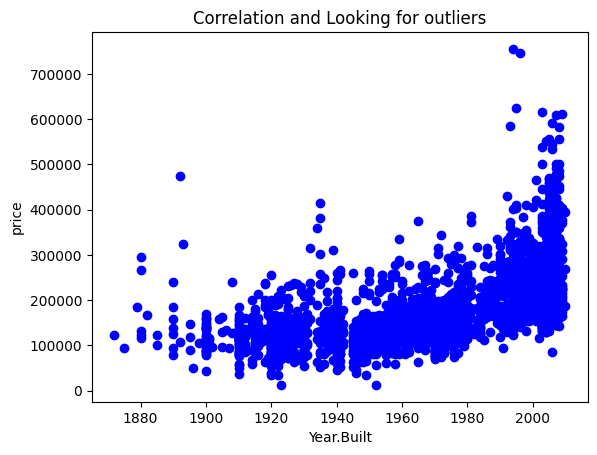

In [14]:
#scatter plot for numerical attributes [Year.Built] to the price and correlation value, r = 0.56
plt.scatter(data['Year.Built'], data['price'], c = "blue", marker = "o")
plt.title("Correlation and Looking for outliers")
plt.xlabel("Year.Built")
plt.ylabel("price")
plt.show()

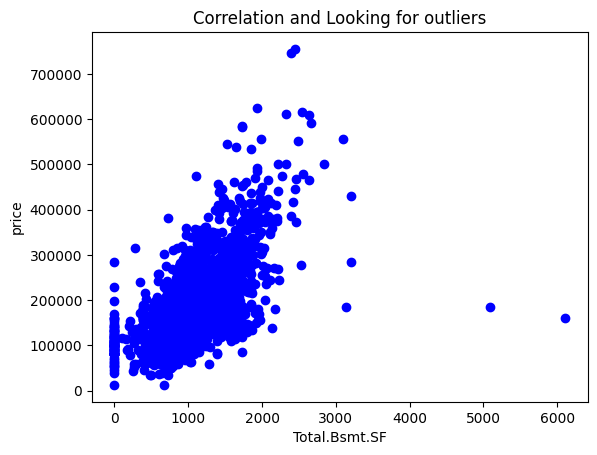

In [15]:
#scatter plot for numerical attributes [Total.Bsmt.SF] to the price and correlation value, r = 0.63

plt.scatter(data['Total.Bsmt.SF'], data['price'], c = "blue", marker = "o")
plt.title("Correlation and Looking for outliers")
plt.xlabel("Total.Bsmt.SF")
plt.ylabel("price")
plt.show()

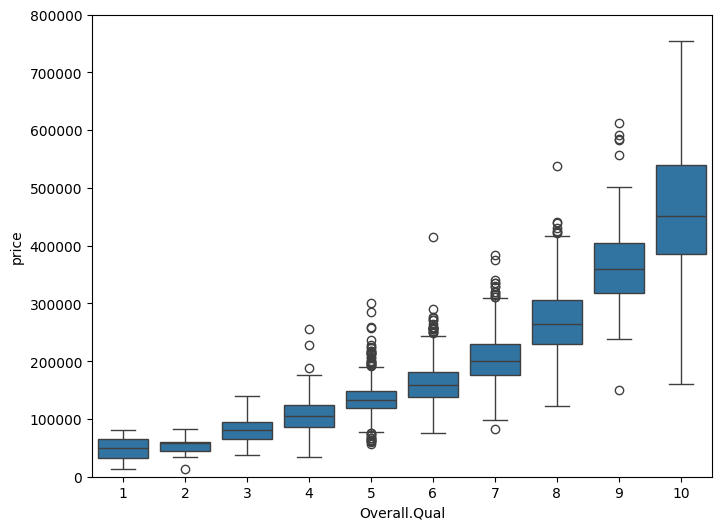

In [16]:
#box plot of Overall.Qual and price

data = pd.concat([data['price'], data['Overall.Qual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x="Overall.Qual", y="price", data=data)
fig.axis(ymin=0, ymax=800000);

For Overall.Qual values are
      10 Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor.

  From this we can see the very excellent quality of houses has the most price

# Fatima's Part

In [22]:
import pandas as pd
import numpy as np
from mlxtend.feature_selection import SequentialFeatureSelector as MLSeqFeatSelector
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA

## Data Collection and Processing

In [2]:
data = pd.read_csv("ames.csv")
data = data.drop(columns=['Alley', 'Fireplace.Qu',
                 'Pool.QC', 'Fence', 'Misc.Feature'], axis=1)

In [3]:
# Missing values inputation

# List of columns for median imputation
columns_median_impute = ['Lot.Frontage', 'Mas.Vnr.Area', 'BsmtFin.SF.1', 'BsmtFin.SF.2',
                         'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath',
                         'Garage.Yr.Blt', 'Garage.Cars', 'Garage.Area']

# List of columns for mode imputation
columns_mode_impute = ['Mas.Vnr.Type', 'Bsmt.Qual',
                       'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1',
                       'BsmtFin.Type.2', 'Electrical', 'Garage.Type',
                       'Garage.Finish', 'Garage.Qual', 'Garage.Cond']
# Impute missing values with the median of the respective column
for column in columns_median_impute:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)

# Impute missing values with the mode of the respective column

for col in columns_mode_impute:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Check missing values again
missing_values_after_imputation = data.isnull().sum()

# Print the summary of missing values after imputation
print(missing_values_after_imputation)

Order             0
PID               0
area              0
price             0
MS.SubClass       0
                 ..
Misc.Val          0
Mo.Sold           0
Yr.Sold           0
Sale.Type         0
Sale.Condition    0
Length: 77, dtype: int64


In [4]:
data.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Lot.Shape,...,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,IR1,...,62,0,0,0,0,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,Reg,...,0,0,0,120,0,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,IR1,...,36,0,0,0,0,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,Reg,...,0,0,0,0,0,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,IR1,...,34,0,0,0,0,0,3,2010,WD,Normal


In [5]:
data.isnull().sum()

Order             0
PID               0
area              0
price             0
MS.SubClass       0
                 ..
Misc.Val          0
Mo.Sold           0
Yr.Sold           0
Sale.Type         0
Sale.Condition    0
Length: 77, dtype: int64

In [6]:
data

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Lot.Shape,...,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,IR1,...,62,0,0,0,0,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,Reg,...,0,0,0,120,0,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,IR1,...,36,0,0,0,0,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,Reg,...,0,0,0,0,0,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,IR1,...,34,0,0,0,0,0,3,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,1003,142500,80,RL,37.0,7937,Pave,IR1,...,0,0,0,0,0,0,3,2006,WD,Normal
2926,2927,923276100,902,131000,20,RL,68.0,8885,Pave,IR1,...,0,0,0,0,0,0,6,2006,WD,Normal
2927,2928,923400125,970,132000,85,RL,62.0,10441,Pave,Reg,...,32,0,0,0,0,700,7,2006,WD,Normal
2928,2929,924100070,1389,170000,20,RL,77.0,10010,Pave,Reg,...,38,0,0,0,0,0,4,2006,WD,Normal


We have no null values in our processed data. The data has been pre-processed and is now ready for feature selection. 

In [7]:
data.shape

(2930, 77)

Our processed data has 77 variables and 2930 observations. we want to perform feature selection on the data in order to determine which variables are most significant for different models based on the accuracy of the models. This will enable us to do better predictions for your organization in terms of determining the housing prices. 

## Defining our Numerical Predictors and Target

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
X_init = data._get_numeric_data()
X_init = X_init.drop(columns='price')
Y = data['price']
X_init.to_csv("X1.csv")
Y.to_csv("Y1.csv")

In [10]:
feature_names = X_init.columns

In [28]:
X = X_init
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=feature_names)
X

,Order,PID,area,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,...,Garage.Area,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold
0,-1.731460,-0.997164,0.309265,-0.877005,3.375742,2.744381,-0.067254,-0.506718,-0.375537,-1.163488,...,0.256673,0.920121,0.214409,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.448057,1.678499
1,-1.730277,-0.996904,-1.194427,-0.877005,0.514952,0.187097,-0.776079,0.393091,-0.342468,-1.115542,...,1.196325,0.366061,-0.704493,-0.358838,-0.103134,1.854530,-0.063031,-0.089422,-0.079602,1.678499
2,-1.729095,-0.996899,-0.337718,-0.877005,0.561850,0.522814,-0.067254,0.393091,-0.441674,-1.259380,...,-0.748103,2.368594,-0.170937,-0.358838,-0.103134,-0.285354,-0.063031,21.985725,-0.079602,1.678499
3,-1.727913,-0.996888,1.207523,-0.877005,1.124628,0.128458,0.641571,-0.506718,-0.110988,-0.779919,...,0.228763,-0.742060,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.816513,1.678499
4,-1.726731,-0.992903,0.255844,0.061285,0.233563,0.467348,-0.776079,-0.506718,0.848000,0.658466,...,0.042693,0.935952,-0.200579,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-1.184969,1.678499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,1.726731,1.106582,-0.982723,0.530430,-1.501671,-0.280621,-0.067254,0.393091,0.418109,-0.012780,...,0.535778,0.207758,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-1.184969,-1.360118
2926,1.727913,1.106588,-1.182556,-0.877005,-0.047827,-0.160296,-0.776079,-0.506718,0.385040,-0.060726,...,0.051996,0.556024,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.079602,-1.360118
2927,1.729095,1.107245,-1.048015,0.647716,-0.329216,0.037199,-0.776079,-0.506718,0.682657,0.370789,...,-2.199447,-0.108848,-0.230221,-0.358838,-0.103134,-0.285354,-0.063031,1.146786,0.288854,-1.360118
2928,1.730277,1.110954,-0.219006,-0.877005,0.374257,-0.017506,-0.776079,-0.506718,0.087423,-0.444296,...,-0.255019,1.157576,-0.141295,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.816513,-1.360118


We made X which are the predictors to contain only numerical data from the processed datasets and also exlcudes the target which is the price. We aslo scaled X inorder to be able to use them for further analysis. We made Y to be our target which is the price.

In [12]:
X.head()

,Order,PID,area,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,...,Garage.Area,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold
0,-1.731460,-0.997164,0.309265,-0.877005,3.375742,2.744381,-0.067254,-0.506718,-0.375537,-1.163488,...,0.256673,0.920121,0.214409,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.448057,1.678499
1,-1.730277,-0.996904,-1.194427,-0.877005,0.514952,0.187097,-0.776079,0.393091,-0.342468,-1.115542,...,1.196325,0.366061,-0.704493,-0.358838,-0.103134,1.854530,-0.063031,-0.089422,-0.079602,1.678499
2,-1.729095,-0.996899,-0.337718,-0.877005,0.561850,0.522814,-0.067254,0.393091,-0.441674,-1.259380,...,-0.748103,2.368594,-0.170937,-0.358838,-0.103134,-0.285354,-0.063031,21.985725,-0.079602,1.678499
3,-1.727913,-0.996888,1.207523,-0.877005,1.124628,0.128458,0.641571,-0.506718,-0.110988,-0.779919,...,0.228763,-0.742060,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.816513,1.678499
4,-1.726731,-0.992903,0.255844,0.061285,0.233563,0.467348,-0.776079,-0.506718,0.848000,0.658466,...,0.042693,0.935952,-0.200579,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-1.184969,1.678499


In [13]:
X.shape

(2930, 38)

In [29]:
Y.head()
X.to_csv("X1.csv")

## Splitting Data Into Training And Testing

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

We splitted our data into training and testing data in order to ensure accuracy while testing our model with a new data that it hasn't seen. Our Aim is to evaluate all models with completelty novel datasets so as get optimal accuracy of different model performance on selected features. 

## Forward Subset Selection 

In [23]:
forward_feature_selection = MLSeqFeatSelector(LinearRegression(),
                                                      k_features=38,
                                                      forward=True,
                                                      floating=False,
                                                      verbose=2,
                                                      scoring='r2',
                                                      cv=10)

In [24]:
forward_feature_selection = forward_feature_selection.fit(X_train, Y_train)


[2023-10-24 17:58:04] Features: 1/38 -- score: 0.6362587269780858
[2023-10-24 17:58:05] Features: 2/38 -- score: 0.7196929678524706
[2023-10-24 17:58:06] Features: 3/38 -- score: 0.7468015901541262
[2023-10-24 17:58:06] Features: 4/38 -- score: 0.7652163772239822
[2023-10-24 17:58:07] Features: 5/38 -- score: 0.7785528992965575
[2023-10-24 17:58:07] Features: 6/38 -- score: 0.7865012088227684
[2023-10-24 17:58:08] Features: 7/38 -- score: 0.7901116301816864
[2023-10-24 17:58:09] Features: 8/38 -- score: 0.7941328586551618
[2023-10-24 17:58:09] Features: 9/38 -- score: 0.7976262756347434
[2023-10-24 17:58:10] Features: 10/38 -- score: 0.7998237637051621
[2023-10-24 17:58:10] Features: 11/38 -- score: 0.8017682696164661
[2023-10-24 17:58:11] Features: 12/38 -- score: 0.802489573862627
[2023-10-24 17:58:12] Features: 13/38 -- score: 0.8034478332925336
[2023-10-24 17:58:12] Features: 14/38 -- score: 0.8044331931102484
[2023-10-24 17:58:13] Features: 15/38 -- score: 0.8049245083319482
[202

In [18]:
forward_feature_selection.k_feature_names_

('Order',
 'PID',
 'area',
 'MS.SubClass',
 'Lot.Frontage',
 'Lot.Area',
 'Overall.Qual',
 'Overall.Cond',
 'Year.Built',
 'Year.Remod.Add',
 'Mas.Vnr.Area',
 'BsmtFin.SF.1',
 'BsmtFin.SF.2',
 'Bsmt.Unf.SF',
 'Total.Bsmt.SF',
 'X1st.Flr.SF',
 'X2nd.Flr.SF',
 'Low.Qual.Fin.SF',
 'Bsmt.Full.Bath',
 'Bsmt.Half.Bath',
 'Full.Bath',
 'Half.Bath',
 'Bedroom.AbvGr',
 'Kitchen.AbvGr',
 'TotRms.AbvGrd',
 'Fireplaces',
 'Garage.Yr.Blt',
 'Garage.Cars',
 'Garage.Area',
 'Wood.Deck.SF',
 'Open.Porch.SF',
 'Enclosed.Porch',
 'X3Ssn.Porch',
 'Screen.Porch',
 'Pool.Area',
 'Misc.Val',
 'Mo.Sold',
 'Yr.Sold')

While trying to fit a Linear Regression Model on our DataSet with 10 fold cross validation, the accuracy of the model increased upto 0.0.8062428045246598 with 25 features and then started decreasing afterwards. Thus, we can conclude that 25 features are the most significant features for our Linear Regression Model

Fitting our Linear Regression Model on our DataSet with 10 fold cross validation gave an accuracy of 0.799823763705161 with 10 best features which is very close to the accuracy obtained by 25 significant features. Thus, we have decided to use 10 best numerical attributes to fit our model. 

In [19]:
forward_feature_selection.k_feature_idx_

(0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37)

In [20]:
forward_feature_selection.k_feature_names_

('Order',
 'PID',
 'area',
 'MS.SubClass',
 'Lot.Frontage',
 'Lot.Area',
 'Overall.Qual',
 'Overall.Cond',
 'Year.Built',
 'Year.Remod.Add',
 'Mas.Vnr.Area',
 'BsmtFin.SF.1',
 'BsmtFin.SF.2',
 'Bsmt.Unf.SF',
 'Total.Bsmt.SF',
 'X1st.Flr.SF',
 'X2nd.Flr.SF',
 'Low.Qual.Fin.SF',
 'Bsmt.Full.Bath',
 'Bsmt.Half.Bath',
 'Full.Bath',
 'Half.Bath',
 'Bedroom.AbvGr',
 'Kitchen.AbvGr',
 'TotRms.AbvGrd',
 'Fireplaces',
 'Garage.Yr.Blt',
 'Garage.Cars',
 'Garage.Area',
 'Wood.Deck.SF',
 'Open.Porch.SF',
 'Enclosed.Porch',
 'X3Ssn.Porch',
 'Screen.Porch',
 'Pool.Area',
 'Misc.Val',
 'Mo.Sold',
 'Yr.Sold')

In [21]:
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(6,)","[0.628805702613203, 0.6660653640860295, 0.6160...",0.636259,"(Overall.Qual,)",0.019246,0.025913,0.008638
2,"(2, 6)","[0.7215715178463211, 0.7496162106939244, 0.607...",0.719693,"(area, Overall.Qual)",0.039483,0.053161,0.01772
3,"(2, 6, 11)","[0.7531876116579214, 0.7793154762965305, 0.529...",0.746802,"(area, Overall.Qual, BsmtFin.SF.1)",0.062743,0.084478,0.028159
4,"(2, 6, 11, 27)","[0.7695561848146746, 0.7865495105820128, 0.583...",0.765216,"(area, Overall.Qual, BsmtFin.SF.1, Garage.Cars)",0.05425,0.073043,0.024348
5,"(2, 3, 6, 11, 27)","[0.7742452335161453, 0.7961939784732024, 0.592...",0.778553,"(area, MS.SubClass, Overall.Qual, BsmtFin.SF.1...",0.055785,0.07511,0.025037
6,"(2, 3, 6, 8, 11, 27)","[0.776913074051871, 0.8015268717680639, 0.5931...",0.786501,"(area, MS.SubClass, Overall.Qual, Year.Built, ...",0.058219,0.078387,0.026129
7,"(2, 3, 6, 8, 10, 11, 27)","[0.7755775399870228, 0.8113405474470146, 0.597...",0.790112,"(area, MS.SubClass, Overall.Qual, Year.Built, ...",0.060532,0.081501,0.027167
8,"(2, 3, 6, 8, 9, 10, 11, 27)","[0.7779795954272781, 0.8147200513884811, 0.604...",0.794133,"(area, MS.SubClass, Overall.Qual, Year.Built, ...",0.060285,0.081169,0.027056
9,"(2, 3, 6, 8, 9, 10, 11, 25, 27)","[0.7853312471966498, 0.8095220034075135, 0.614...",0.797626,"(area, MS.SubClass, Overall.Qual, Year.Built, ...",0.058085,0.078206,0.026069
10,"(2, 3, 6, 8, 9, 10, 11, 18, 25, 27)","[0.7857607322501086, 0.8101973318543914, 0.630...",0.799824,"(area, MS.SubClass, Overall.Qual, Year.Built, ...",0.05355,0.0721,0.024033


The best 10 features for our Linear regression Model as returned by Forward Selection are shown above. They are the features with the most significant impact according to our Forward Selection Algorithm

## Backward Subset Selection 

In [27]:
backward_feature_selection = SequentialFeatureSelector(LinearRegression(),
                                                      k_features=10,
                                                      forward=False,
                                                      floating=False,
                                                      verbose=2,
                                                      scoring='r2',
                                                      cv=10)

In [28]:
backward_feature_selection = backward_feature_selection.fit(X_train, Y_train)


[2023-10-24 12:03:12] Features: 37/10 -- score: 0.7882243906620069
[2023-10-24 12:03:14] Features: 36/10 -- score: 0.7950585900598325
[2023-10-24 12:03:16] Features: 35/10 -- score: 0.7985584905108154
[2023-10-24 12:03:18] Features: 34/10 -- score: 0.8016493243038454
[2023-10-24 12:03:19] Features: 33/10 -- score: 0.8028189579998806
[2023-10-24 12:03:21] Features: 32/10 -- score: 0.8030978050165686
[2023-10-24 12:03:22] Features: 31/10 -- score: 0.8024265267783601
[2023-10-24 12:03:23] Features: 30/10 -- score: 0.805122665251291
[2023-10-24 12:03:24] Features: 29/10 -- score: 0.80527145098354
[2023-10-24 12:03:25] Features: 28/10 -- score: 0.805047409517764
[2023-10-24 12:03:26] Features: 27/10 -- score: 0.8069877970684287
[2023-10-24 12:03:27] Features: 26/10 -- score: 0.806386662056753
[2023-10-24 12:03:28] Features: 25/10 -- score: 0.8071105654000392
[2023-10-24 12:03:28] Features: 24/10 -- score: 0.8072127185511346
[2023-10-24 12:03:29] Features: 23/10 -- score: 0.8073870157890364

In [29]:
backward_feature_selection.k_feature_names_

('area',
 'MS.SubClass',
 'Overall.Qual',
 'Year.Built',
 'Year.Remod.Add',
 'Mas.Vnr.Area',
 'Bsmt.Full.Bath',
 'Fireplaces',
 'Garage.Cars',
 'Screen.Porch')

The top 10 best features with the most significant as returned by our Backward Subset Selection is shown above. More than 90% of the features returned by Backward Selection are in the Forward Selection. 

## Data Regularization

We have decided to use the union of the best 10 predictors returned by both forward and backward subset selection to fit a simple linear model. 

In [30]:
predictors_to_use = ['area', 'MS.SubClass', 'Overall.Qual', 'Year.Built', 
                     'Year.Remod.Add', 'Mas.Vnr.Area', 'Bsmt.Full.Bath', 
                     'Fireplaces', 'Garage.Cars', 'Screen.Porch', 'BsmtFin.SF.1']

In [31]:
X_to_use = X[predictors_to_use]
Y_to_use = Y

In [32]:
X_to_use

,area,MS.SubClass,Overall.Qual,Year.Built,Year.Remod.Add,Mas.Vnr.Area,Bsmt.Full.Bath,Fireplaces,Garage.Cars,Screen.Porch,BsmtFin.SF.1
0,0.309265,-0.877005,-0.067254,-0.375537,-1.163488,0.061046,1.084376,2.162180,0.306589,-0.285354,0.431223
1,-1.194427,-0.877005,-0.776079,-0.342468,-1.115542,-0.566039,-0.821576,-0.925143,-1.008648,1.854530,0.055760
2,-0.337718,-0.877005,-0.067254,-0.441674,-1.259380,0.038650,-0.821576,-0.925143,-1.008648,-0.285354,1.054800
3,1.207523,-0.877005,0.641571,-0.110988,-0.779919,-0.566039,1.084376,2.162180,0.306589,-0.285354,1.366588
4,0.255844,0.061285,-0.776079,0.848000,0.658466,-0.566039,-0.821576,0.618518,0.306589,-0.285354,0.764969
...,...,...,...,...,...,...,...,...,...,...,...
2925,-0.982723,0.530430,-0.067254,0.418109,-0.012780,-0.566039,1.084376,-0.925143,0.306589,-0.285354,0.826448
2926,-1.182556,-0.877005,-0.776079,0.385040,-0.060726,-0.566039,1.084376,-0.925143,0.306589,-0.285354,-0.310920
2927,-1.048015,0.647716,-0.776079,0.682657,0.370789,-0.566039,-0.821576,-0.925143,-2.323886,-0.285354,-0.231876
2928,-0.219006,-0.877005,-0.776079,0.087423,-0.444296,-0.566039,1.084376,0.618518,0.306589,-0.285354,1.379762


In [33]:
Y_to_use

0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
2925    142500
2926    131000
2927    132000
2928    170000
2929    188000
Name: price, Length: 2930, dtype: int64

In [34]:
X_train_to_use, X_test_to_use, Y_train_to_use, Y_test_to_use = train_test_split(X_to_use, Y_to_use, test_size=0.3, random_state=1)

We splitted our selected features into training and testing obeservations so as to fit our linear model with the training data and test the model using the testing data in order to determine the accuracy of our model. 

In [35]:
reg = LinearRegression().fit(X_train_to_use, Y_train_to_use)

In [36]:
reg.score(X_test_to_use, Y_test_to_use)

0.8427447741655747

In [37]:
reg.score(X_train_to_use, Y_train_to_use)

0.8104804133781423

It could be seen that our fitted linear model on the selected subset of features did performed well on both the testing data and the training data. 

In [38]:
lasso_reg = Lasso(alpha=50, max_iter=100, tol=0.1)

lasso_reg.fit(X_train_to_use, Y_train_to_use)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [39]:
lasso_reg.score(X_test_to_use, Y_test_to_use) 

0.8374349369621584

In [40]:
lasso_reg.score(X_train_to_use, Y_train_to_use)

0.8068356614060166

The prediction accuracy of the L1 Regularization (Lasso) performed similarly to our Linear Regression model and din't do bette than the Linear model. 

In [41]:
ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train_to_use, Y_train_to_use)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [42]:
ridge_reg.score(X_test_to_use, Y_test_to_use)

0.8418809001593126

In [43]:
ridge_reg.score(X_train_to_use, Y_train_to_use)

0.8103511848927134

Similarly, the prediction accuracy of the L2 Regularization (The Ridge) performed similarly to our Linear Regression model as well as the L1 Regularization (The Lasso) and din't do bette than the Linear model. We can concluse that the Linear Model is a good fit to the selected features and has a reasonable amount of prediction accuracy

In [44]:
reg = LinearRegression().fit(X_train, Y_train)

In [45]:
reg.score(X_test, Y_test)

0.854669421360667

In [46]:
reg.score(X_train, Y_train)

0.8274163384557358

So we tried to fit our linear regression in all the 38 numerical values in the dataset in order to check if our linear regression model will over_fit the data. However, Overfitting did not occur as the model did pretty well in evaluating the tested data. We will go ahead and do Lasso and Ridge regression in all the 38 numerical values of the dataset and see if we will get better test performance. 

In [47]:
lasso_reg = Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_train, Y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [48]:
lasso_reg.score(X_test, Y_test)

0.8490847902867111

In [49]:
lasso_reg.score(X_train, Y_train)

0.8212536401581539

It could be seen that Lasso regression model performed similarly to our Linear Regression model in both the training and testing of all the numerical features in the dataset. Thus, we can confident that our linear model will perform a good prediction with atleast 85% accuracy when fittend in either the subset returned by the forward selection or on all the 38 numerical variables in the dataset. 

Since the performance of the model with few subset selected of about 11 is similar to the performance of the model with all the 38 features selected. We can say that fitting the model to the eleven selected features preserve as much information provided by the 38 numerical attributes. 

## Dimensionality Reduction and Model Selection

In [50]:
print(X.shape, Y.shape)

(2930, 38) (2930,)


In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=30)

In [52]:
model =LinearRegression()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.8120096627871155

In [53]:
model.score(X_train, Y_train)

0.8378472323147215

So what my team are trying to do is to fit a Linear Regression model on all the predictor features in order to take note of the training accuracy and the testing accuracy of the model before doing a Principal Component Analysis for subset selection. 

In [54]:
X_init  #this is the unscaled X. we need it for performing PCA. 

,Order,PID,area,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,...,Garage.Area,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold
0,1,526301100,1656,20,141.0,31770,6,5,1960,1960,...,528.0,210,62,0,0,0,0,0,5,2010
1,2,526350040,896,20,80.0,11622,5,6,1961,1961,...,730.0,140,0,0,0,120,0,0,6,2010
2,3,526351010,1329,20,81.0,14267,6,6,1958,1958,...,312.0,393,36,0,0,0,0,12500,6,2010
3,4,526353030,2110,20,93.0,11160,7,5,1968,1968,...,522.0,0,0,0,0,0,0,0,4,2010
4,5,527105010,1629,60,74.0,13830,5,5,1997,1998,...,482.0,212,34,0,0,0,0,0,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,1003,80,37.0,7937,6,6,1984,1984,...,588.0,120,0,0,0,0,0,0,3,2006
2926,2927,923276100,902,20,68.0,8885,5,5,1983,1983,...,484.0,164,0,0,0,0,0,0,6,2006
2927,2928,923400125,970,85,62.0,10441,5,5,1992,1992,...,0.0,80,32,0,0,0,0,700,7,2006
2928,2929,924100070,1389,20,77.0,10010,5,5,1974,1975,...,418.0,240,38,0,0,0,0,0,4,2006


In [55]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_init)
X_pca.shape

(2930, 2)

In [56]:
pca.explained_variance_ratio_

array([9.99999998e-01, 1.74303127e-09])

Over 99% of the variation in the dataset can be explained by the First Principal Component. This shows that the variables are highly correlated with each other and the First Principal Componenent is enough to summarize the relationship really well

In [57]:
X_pca

array([[-1.88163397e+08,  2.18900025e+04],
       [-1.88114457e+08,  1.72151870e+03],
       [-1.88113487e+08,  4.45360370e+03],
       ...,
       [ 2.08935628e+08, -1.98994450e+01],
       [ 2.09635573e+08, -4.22266359e+02],
       [ 2.09686553e+08, -8.06460499e+02]])

In [58]:
X_train_pca, x_test_pca, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=30)

In [59]:
model = LinearRegression()
model.fit(X_train_pca, Y_train)
model.score(x_test_pca, Y_test)

0.06627955643320793

In [60]:
model.score(X_train_pca, Y_train)

0.14573670315686915

It can be seen that principal component subset selection does not perform well in both the training and testing accuracy. This is because Dimension reduction does not consider the response variable. It assumes that the linear combination of predictors with high variance is probably going to be associated with the response. However, there is no reason for that to be the case and infact it might not be.  

# Ian's Part

In [61]:
#--Basics---------------
import pandas as pd
import numpy as np
#--Data Visualization----
import matplotlib.pyplot as plt
import seaborn as sns

#---Scikit-Learn--------
from sklearn import set_config
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.utils import estimator_html_repr

#---Misc------------------
import expectexception
from itertools import combinations

## Define Data

In [62]:
data = pd.read_csv(r"ames.csv")
data = data.drop(columns=['Alley', 'Fireplace.Qu', 'Pool.QC', 'Fence', 'Misc.Feature'], axis=1)
columns_numeric = ['Lot.Frontage', 'Mas.Vnr.Area', 'BsmtFin.SF.1', 'BsmtFin.SF.2',
                         'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath',
                        'Garage.Yr.Blt', 'Garage.Cars', 'Garage.Area']
columns_categorical = [ 'Mas.Vnr.Type','Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1',
                        'BsmtFin.Type.2','Electrical', 'Garage.Type', 'Garage.Finish', 'Garage.Qual', 'Garage.Cond']


## Handle Missing Values

In [63]:
# Impute missing values with the median of the respective column
for column in columns_numeric:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)
    
# Impute missing values with the mode of the respective column
for col in columns_categorical:
    data[col].fillna(data[col].mode()[0], inplace=True)

X, y = data.loc[:, data.columns.drop('price')], data['price']

## Encoding

In [64]:
encoder = OneHotEncoder(sparse_output = False).set_output(transform="pandas")
X_ohe_cat = encoder.fit_transform(X[columns_categorical])
X_ohe = pd.concat([X_ohe_cat, X[columns_numeric]], axis=1)
X_ohe.to_csv("df.csv")


## Forward Selection

In [30]:
estimator = LinearRegression()
sfs_forward = SequentialFeatureSelector(estimator=estimator, direction="forward", tol=.001).set_output(transform="pandas")
M_forward = sfs_forward.fit_transform(X_ohe, y)
print(M_forward.columns)

TypeError: SequentialFeatureSelector.__init__() got an unexpected keyword argument 'direction'

## Backward Selection

In [67]:
sfs_backward = SequentialFeatureSelector(estimator=estimator, direction="backward", tol=0).set_output(transform="pandas")
M_backward = sfs_backward.fit_transform(X_ohe, y)
print(M_backward.columns)

Index(['Mas.Vnr.Type_BrkCmn', 'Mas.Vnr.Type_BrkFace', 'Mas.Vnr.Type_CBlock',
       'Mas.Vnr.Type_Stone', 'Bsmt.Qual_Ex', 'Bsmt.Qual_Fa', 'Bsmt.Qual_Gd',
       'Bsmt.Qual_Po', 'Bsmt.Qual_TA', 'Bsmt.Cond_Ex', 'Bsmt.Cond_Gd',
       'Bsmt.Cond_Po', 'Bsmt.Cond_TA', 'Bsmt.Exposure_Av', 'Bsmt.Exposure_Gd',
       'Bsmt.Exposure_Mn', 'Bsmt.Exposure_No', 'BsmtFin.Type.1_ALQ',
       'BsmtFin.Type.1_BLQ', 'BsmtFin.Type.1_GLQ', 'BsmtFin.Type.1_LwQ',
       'BsmtFin.Type.1_Rec', 'BsmtFin.Type.1_Unf', 'BsmtFin.Type.2_ALQ',
       'BsmtFin.Type.2_BLQ', 'BsmtFin.Type.2_GLQ', 'BsmtFin.Type.2_LwQ',
       'BsmtFin.Type.2_Rec', 'BsmtFin.Type.2_Unf', 'Electrical_FuseA',
       'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix',
       'Electrical_SBrkr', 'Garage.Type_Attchd', 'Garage.Type_Basment',
       'Garage.Type_BuiltIn', 'Garage.Type_CarPort', 'Garage.Type_Detchd',
       'Garage.Finish_Fin', 'Garage.Finish_RFn', 'Garage.Finish_Unf',
       'Garage.Qual_Ex', 'Garage.Qual_Fa', 'Garage.Qual